## False Accept Risk in Ball Bearing Manufacturing

Example from JCGM 106, section 9.5.4:

"A manufacturer produces large numbers of precision ball bearings. The performance specification for these bearings (the items) requires that, for each of them, the radial error motion (the property of interest) be less than 2 $\mu$m. Radial error motion of a bearing is undesired motion perpendicular to the axis of rotation. For a perfect bearing, the radial error motion would be zero; any real bearing will have a positive radial error motion."

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4, 3)

from suncal import risk

Start by defining the product distribution. JCGM 106 recommends a gamma distribution because the raidal error motion is close to zero, but must be positive.

In [2]:
UL = 2  # Upper Tolerance of 2
products = stats.gamma(a=4, scale=1/4)  # Note stats.gamma uses 'scale' parameter, which is 1/b

What is risk that any bearing, with no inspection, falls OOT? Use `risk.specific_risk`.

In [3]:
risk.specific_risk(products, UL=UL, LL=0).total

0.04238011199168401

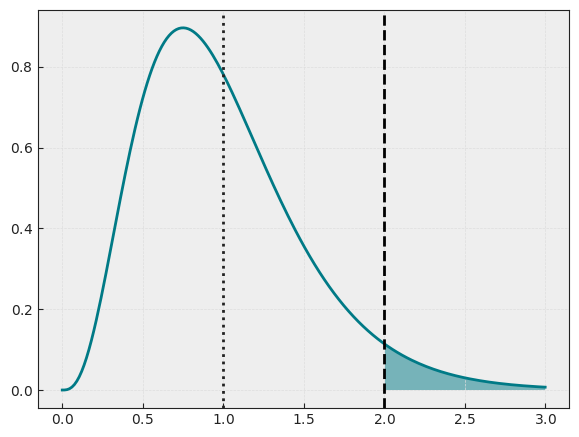

In [4]:
# Recreate JCGM Figure 14
x = np.linspace(0, 3, num=200)
y = products.pdf(x)
plt.plot(x, y)
plt.fill_between(x, y, where=(x>UL), alpha=.5)
plt.axvline(UL, ls='--', color='black');
plt.axvline(products.mean(), ls=':')

The 4.2% risk of OOT is too high to be acceptable. Each bearing should be inspected and accepted/rejected to reduce this risk.
Adding a measurement with uncertainty of 0.25 um, results in a false accept risk of 0.8%.

In [5]:
measure = stats.norm(scale=0.25)
risk.PFA(products, measure, LL=0, UL=UL)

0.008019111884303471

The customer requirements specify a false accept rate no greater than 0.1%, so guardbanding is necessary. Using `risk.guardband`, determine the acceptance limit to give us 0.1% PFA.


In [6]:
gb = risk.guardband.target(products, measure, LL=0, UL=UL, target_PFA=0.001)
gb

0.3281712284559932

The result is the absolute guardband to subtract from the upper limit, so the new reduced acceptance limit is:

In [7]:
UL - gb

1.6718287715440068